Performance testing for PCM regression analysis

In [1]:
import PcmPy as pcm
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from numpy import exp, sqrt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import time
from test_regression_performance import r2_score, method_compare, pcm_performance, likelihood_compare

['/Users/jdiedrichsen/Python/PcmPy/tests', '/Users/jdiedrichsen/Python/cerebellum_connectivity', '/Users/jdiedrichsen/Python/pyrsa_folder', '/Users/jdiedrichsen/Python', '/Users/jdiedrichsen/Python/PcmPy/tests', '/anaconda3/lib/python37.zip', '/anaconda3/lib/python3.7', '/anaconda3/lib/python3.7/lib-dynload', '', '/anaconda3/lib/python3.7/site-packages', '/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/Users/jdiedrichsen/.ipython']


## Comparision of different N-scaling for different likelihood functions 

In [ ]:
TL = pd.DataFrame()
Q = 20
P = 1
theta = np.array([-1.0,1.0])
comp = np.zeros((Q,),dtype = int)
for N in [10,50,100,200,400,600,800,1000, 1500]: 
    D = likelihood_compare(comp, theta, P = P, N = N, num_sim = 20,likelihood_fcn=['YYT','YTY','YTY1'])
    D['N']=N
    D['P']=P
    D['Q']=Q
    TL = TL.append(D, ignore_index=True)

## Compare likelihood functions for different shapes of Y
Likelihood functions can depend on quadratic form $Y^T A  Y$ or $Y Y^T A$. 
Depending of the shape on $Y$, one can be faster than the other 

In [4]:
TL = pd.DataFrame()
comp  = np.array([0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3]) # 20 regressors in 4 groups
Q = comp.shape[0]
theta = np.array([0.0,-2.0,-3.0,-1.0,1.0]) # Theta's for simulation 
for P in [1, 10, 50, 75, 100, 200]:
    for N in [100, 150, 200, 300, 400, 500, 600]:
        D = likelihood_compare(comp, theta, P = P, N = N, num_sim = 50)
        D['N']=N
        D['P']=P
        D['Q']=Q
        TL = TL.append(D, ignore_index=True)

In [5]:
A= pd.pivot_table(TL[TL['likefcn']=='YYT'], values='time_Pcm', index=['N'], columns=['P'], aggfunc=np.mean)
B= pd.pivot_table(TL[TL['likefcn']=='YTY'], values='time_Pcm', index=['N'], columns=['P'], aggfunc=np.mean)
(A-B)/A

P,1,10,50,75,100,200
N,,,,,,
100,0.030399,-0.044602,-0.128947,-0.172148,-0.207893,-0.463523
150,0.079855,0.050251,-0.101155,-0.177441,-0.288761,-0.518333
200,0.157879,0.078655,-0.048752,-0.177466,-0.242117,-0.587889
300,0.271786,0.201822,0.029170,-0.076502,-0.206087,-0.703710
400,0.210169,0.247502,0.114945,0.025219,-0.070725,-0.387134
500,0.312209,0.176760,0.090549,0.029876,-0.046540,-0.308699
600,0.283209,0.203854,0.139084,0.058888,-0.017137,-0.229315


From this it seems like that the Switch-point between the likelihood functions is aproximately at N > 7* P.

<AxesSubplot:xlabel='N', ylabel='time_Pcm'>

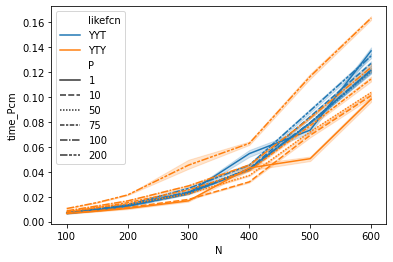

In [6]:
sb.lineplot(data = TL, x = 'N', y = 'time_Pcm', hue='likefcn', style = 'P' )

## Compare cross-validation vs. PCM for simple Ridge - influence of N 

In [4]:
TN = pd.DataFrame()
Q = 20
P = 1
theta = np.array([-1.0,1.0])
for N in [10,50,100,200,400,600,800,1000, 1500]: 
    comp = np.zeros((Q,),dtype = int)
    D = method_compare(comp, theta, P = P, N = N)
    D['N']=N
    D['P']=P
    D['Q']=Q
    TN = TN.append(D, ignore_index=True)

<AxesSubplot:xlabel='N', ylabel='R2_Rid'>

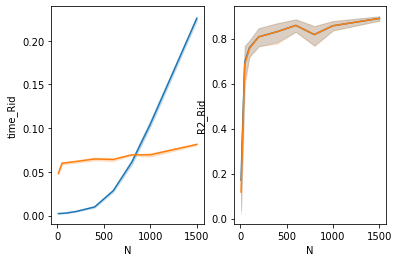

In [5]:
plt.subplot(1,2,1)
sb.lineplot(data = TN, x='N', y='time_Pcm')
sb.lineplot(data = TN, x='N', y='time_Rid')
plt.subplot(1,2,2)
sb.lineplot(data = TN, x='N', y='R2_Pcm')
sb.lineplot(data = TN, x='N', y='R2_Rid')

## Compare cross-validation vs. PCM for simple Ridge - influence of Q

In [8]:
TQ = pd.DataFrame()
theta = np.array([-1.0,1.0])
P=100
N=100
for Q in [1,5,10,50,100]: 
    comp = np.zeros((Q,),dtype = int)
    D = method_compare(comp, theta, P = P, N = N)
    D['N']=N
    D['P']=P
    D['Q']=Q
    TQ = TQ.append(D, ignore_index=True)

<AxesSubplot:xlabel='Q', ylabel='R2_Rid'>

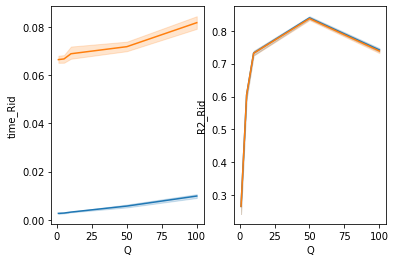

In [9]:
plt.subplot(1,2,1)
sb.lineplot(data = TQ, x='Q', y='time_Pcm')
sb.lineplot(data = TQ, x='Q', y='time_Rid')
plt.subplot(1,2,2)
sb.lineplot(data = TQ, x='Q', y='R2_Pcm')
sb.lineplot(data = TQ, x='Q', y='R2_Rid')

## Compare cross-validation vs. PCM for simple Ridge - influence of P

In [10]:
TP = pd.DataFrame()
theta = np.array([-1.0,1.0])
Q = 20
N = 100
for P in [1,10,100,500,1000,1500,2000]: 
    comp = np.zeros((Q,),dtype = int)
    D = method_compare(comp, theta, P = P, N = N)
    D['N']=N
    D['P']=P
    D['Q']=Q
    TP = TP.append(D, ignore_index=True)

<AxesSubplot:xlabel='P', ylabel='R2_Rid'>

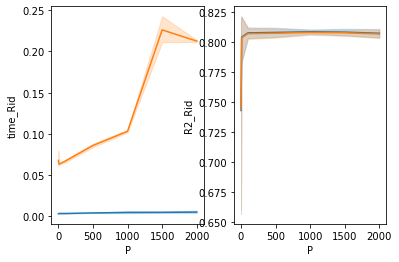

In [11]:
plt.subplot(1,2,1)
sb.lineplot(data = TP, x='P', y='time_Pcm')
sb.lineplot(data = TP, x='P', y='time_Rid')
plt.subplot(1,2,2)
sb.lineplot(data = TP, x='P', y='R2_Pcm')
sb.lineplot(data = TP, x='P', y='R2_Rid')